# HW2. Проверка гипотез
#### Ильичёв А.С., 693

In [234]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

%matplotlib inline

## Задача 1

Пусть $X_1, \dots, X_n$ - выборка из $N(\theta,1)$. В одной из домашних работ курса по математической статистике было показано, что РНМК уровня $\alpha$ для проверки $H_0: \theta = 0$ против $H_1^>:\theta > 0$ является $S_1 = \{\sum_1^n X_i \ge u_{1-\alpha}\}$. Это прямо следует из теоремы о монотонном отношении правдоподобия, монотонность по $T(X) = \sum_1^n X_i \sim N(0, n)$, значит,  $u_{1-\alpha}$ - квантиль $N(0, n)$. 

Аналогично РНМК уровня $\alpha$ для проверки $H_0: \theta = 0$ против $H_1^<:\theta < 0$ является $S_2 = \{\sum_1^n X_i \le u_{\alpha}\}$

То есть $S_1$ - в частности (единственный) РНМК уровня $\alpha$ для проверки $H_0 : \theta = 0$ против $H_1: \theta = \theta_1 > 0$ (функция мощности этого критерия для распределения $P_{\theta_1}$ $\ge$, чем у любого другого критерия).

Рассмотрим теперь $\theta_2 < 0$ и функцию мощности для $P_{\theta_2}$. 
$$
\beta(\theta_2, S_2) = P_{\theta_2}(T < u_\alpha) = P_0(T < u_\alpha - n\theta_2),  
$$
где последнее равенство следует из замены переменных в интеграле от плотности  распределения  $T(X)$.
$$
\beta(\theta_2, S_2) = P_0(T < u_\alpha - n\theta_2) > P_0(T < u_\alpha) = P_0(T > u_{1-\alpha}) = P_{\theta_2}(T > u_{1-\alpha} + n\theta_2) > P_{\theta_2}(T > u_{1-\alpha}) = \beta(\theta_2, S_1)
$$
(помним, что $\theta_2 < 0)$, то есть функция мощности у $S_2$  для $\theta_2$ больше, чем у $S_1$. 

Значит, $S_1$ не может быть РНМК для проверки $H_0: \theta = 0$ против $H_1:\theta \ne 0$. Но любой другой критерий будет иметь меньшую функцию мощности на $\theta_1$, чем $S_1$, а значит, тоже не будет РНМК. Таким образом, искомого РНМК не существует.

## Задача 2

По сути, мы имеем бернуллиевские выборки с результатами лечения. Пусть для плацебо $X_i \sim Bern(p_1), \,i=1,\dots, n$, а для лекарства, которое мы сравниваем с плацебо, $Y_j \sim Bern(p_2),\,j=1,\dots,m $. Тогда мы проверяем гипотезу $H_0: p_1 = p_2$ против $H_1: p_1 > p_2$ ($p_k$ - вероятность осложнений). По ЦПТ имеем:
$$
\hat p_1 = \overline X \overset{d}{\longrightarrow} N\left(p_1, \frac{p_1(1- p_1)}{n}\right)
$$
$$
\hat p_2 = \overline Y \overset{d}{\longrightarrow} N\left(p_2, \frac{p_2(1- p_2)}{m}\right)
$$
По теореме о наследовании сходимости,
$$
\overline X - \overline Y \overset{d}{\longrightarrow} N\left(p_1-p_2, \frac{p_1(1- p_1)}{n} + \frac{p_2(1- p_2)}{m}\right).
$$
Тогда при верной $H_0$ имеем (из леммы Слуцкого)
$$
T(X, Y) = \frac{\hat p_1-\hat p_2}{\hat\sigma} \overset{d}{\longrightarrow} N(0,1), \text{где } \hat\sigma = \sqrt{\frac{\hat p_1(1- \hat p_1)}{n} + \frac{\hat p_2(1- \hat p_2)}{m}}
$$
Воспользовавшись односторонним критерием Вальда, получим 
$$
S = \{T(X, Y) > u_{1 - \alpha} \text{(квантиль $N(0,1)$)}\} \text{- критерий уровня значимости $\alpha$.}
$$

In [235]:
# placebo
n = 80
p1 = 45 / n

In [236]:
alpha = 0.05
u = sts.norm.ppf(1 - alpha)
u

1.6448536269514722

In [237]:
def t_stat(n, p1, m, p2):
    sigma = np.sqrt(p1 * (1 - p1) / n + p2 * (1 - p2) / m)
    t = (p1 - p2) / sigma
    return t, t > u

In [238]:
# Chlorpromazine
m2 = 75
p2 = 26 / m2
t_stat(n, p1, m2, p2)

(2.7643637780027186, True)

Отвергаем $H_0$, лекарство лучше.

In [239]:
# Dimenhydrinate
m3 = 85
p3 = 52 / m3
t_stat(n, p1, m3, p3)

(-0.6429872617820936, False)

Не отвергаем $H_0$, лекарство не лучше, а т.к. значение отрицательное, может быть и хуже (гипотеза $p_1 < p_2$, однако на заданном уровне значимости это также нельзя заключить, потому что $u_\alpha = -u_{1-\alpha}$).

In [240]:
# Pentobarbital (100 mg)
m4 = 67
p4 = 35 / m4
t_stat(n, p1, m4, p4)

(0.48642750289502995, False)

Не отвергаем  $H_0$ , лекарство не лучше.

In [241]:
# Pentobarbital (150 mg)
m5 = 85
p5 = 37 / m5
t_stat(n, p1, m5, p5)

(1.6466051393070562, True)

Отвергаем $H_0$, лекарство лучше.

## Задача 3

Загрузим выборку.

In [242]:
sample = np.load("data2.3.npy")
n = len(sample)
n

200

In [243]:
mean = np.mean(sample)
mean

10.495

Построим гистограмму выборки и функцию вероятности для заданного распределения.

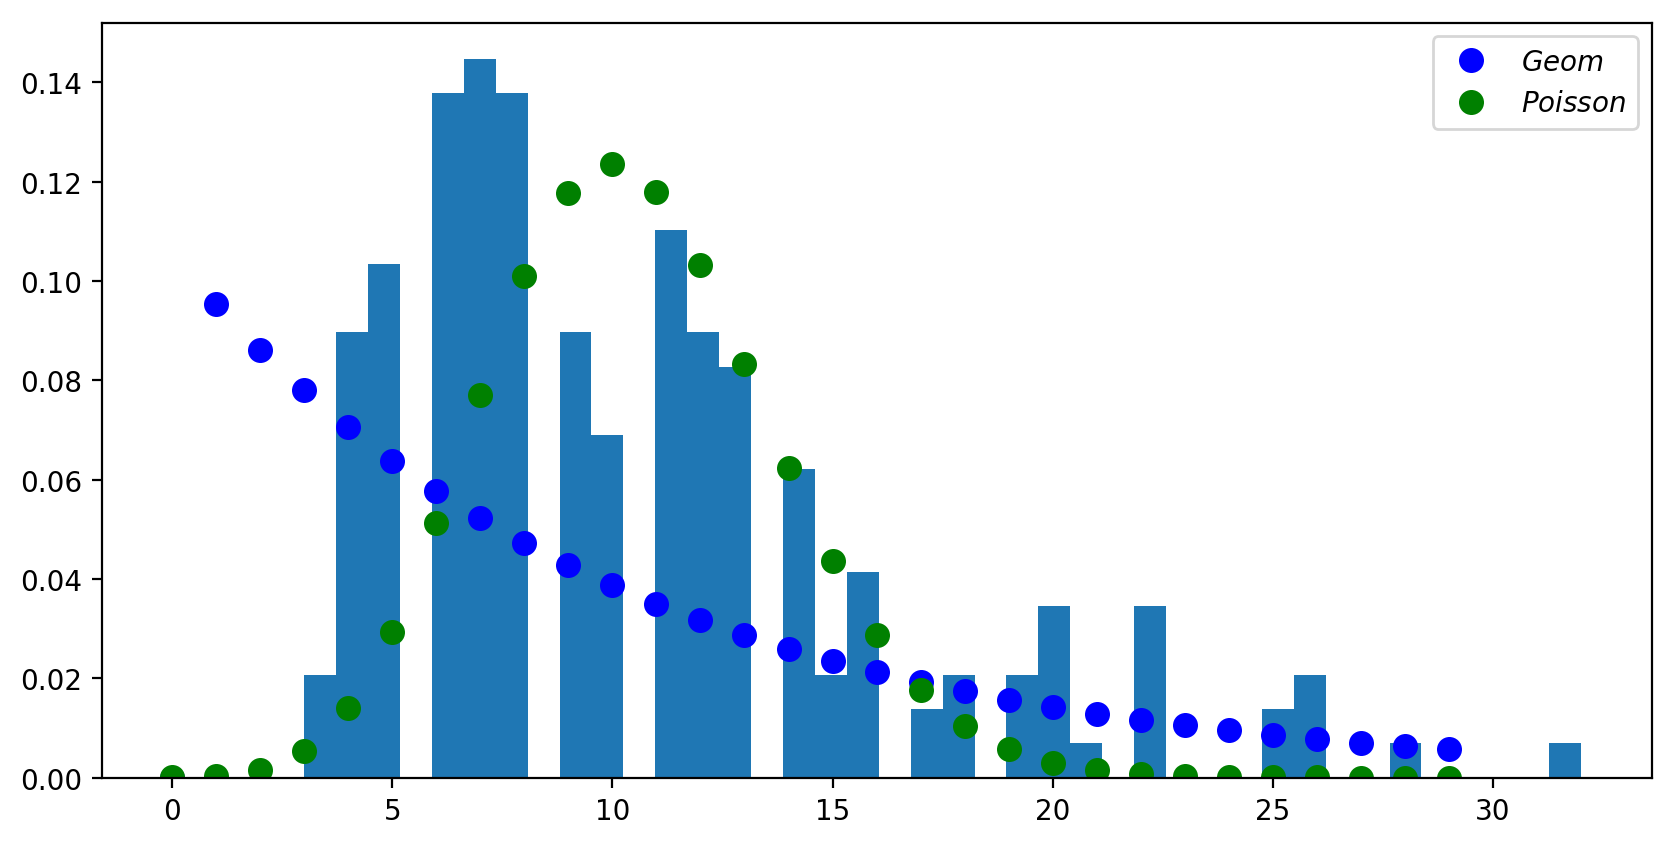

In [244]:
x = np.arange(0, 30)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(x, sts.geom(1 / mean).pmf(x),'bo', ms=8, label=r'$Geom$')
plt.plot(x, sts.poisson(mean).pmf(x), 'go', ms=8, label=r'$Poisson$')
plt.hist(sample, bins=40, density=True)
plt.legend()
plt.show()

$H_0: X\sim Geom(p)$ vs. $H_1: X\sim Pois(\lambda)$. Априорное распределение для геометрического закона $U[0,1]$, для пуассоновского $U[0,6]$. Статистика будет иметь вид 

$$
K = \frac{\int_0^1 (1-p)^{\sum_1^nX_i-n} p^ndp}{\int_0^6\frac{\lambda^{\sum_1^nX_i}e^{-n\lambda}}{6\prod (X_i!)}d\lambda}
$$

Интегралы будем считать численно и вместо функции правдоподобия возьмем ее логарифм. Тогда распределение по-прежнему не будет зависеть от параметров и можно будет получить критерий с помощью моделирования. 

$$
K_l = \frac{\int_0^1 ((\sum_1^nX_i-n)\log(1-p)+ n\log p)dp}{\int_0^6 ((\sum_1^nX_i)\log\lambda - n\lambda - \sum_1^n\log(X_i!)) \frac{d\lambda}{6}}
$$

Однако функция правдоподобия меньше единицы, поэтому максимум функции правдоподобия отвечает минимуму __абсолютного__ значения ее логарифма, то есть при условии верности $H_0$ статистика $K_l$ должна быть  меньше, чем при верной $H_1$ (а не больше, как в случае статистики $K$), поэтому неравенство в критерии будет в другую сторону.

In [245]:
from scipy.integrate import quad

In [246]:
def logfact(x):
    return np.sum([np.log(float(y)) for y in range(1, int(x) + 1)])

In [247]:
t1_s = np.sum(sample)
t2_s = np.sum([logfact(x) for x in sample])

In [248]:
def f(x, T1):
    return (T1 - n) * np.log(1 - x) + n * np.log(x)
    
def g(x, T1, T2):
    return (T1 * np.log(x) - n * x - T2) / 6

Посчитаем статистику для нашей выборки.

In [249]:
kl = quad(f, 0, 1, args=t1_s)[0] / quad(g, 0, 6, args=(t1_s, t2_s))[0] 
kl

0.8586308629788113

Теперь смоделируем распределение статистики $K_l$ при условии верности $H_0$, генерируя $N = 5000$ выборок.

In [250]:
N = 5000
ks = []
for i in range(N):
    p = sts.uniform.rvs()
    mod_sample = sts.geom(p).rvs(n)
    t1 = np.sum(mod_sample)
    t2 = np.sum([logfact(x) for x in mod_sample])
    ks.append(quad(f, 0, 1, args=t1)[0] / quad(g, 0, 6, args=(t1, t2))[0])
ks = np.array(ks)

Построим нормированную гистограмму распределения и отметим на ней выборочные квантили уровня 0.95 $(q_{0.95})$, 0.99 и 0.9. 

q0.99 = 1.009090384325542
q0.95 = 0.9836246313664643
q0.9 = 0.9656040050799958


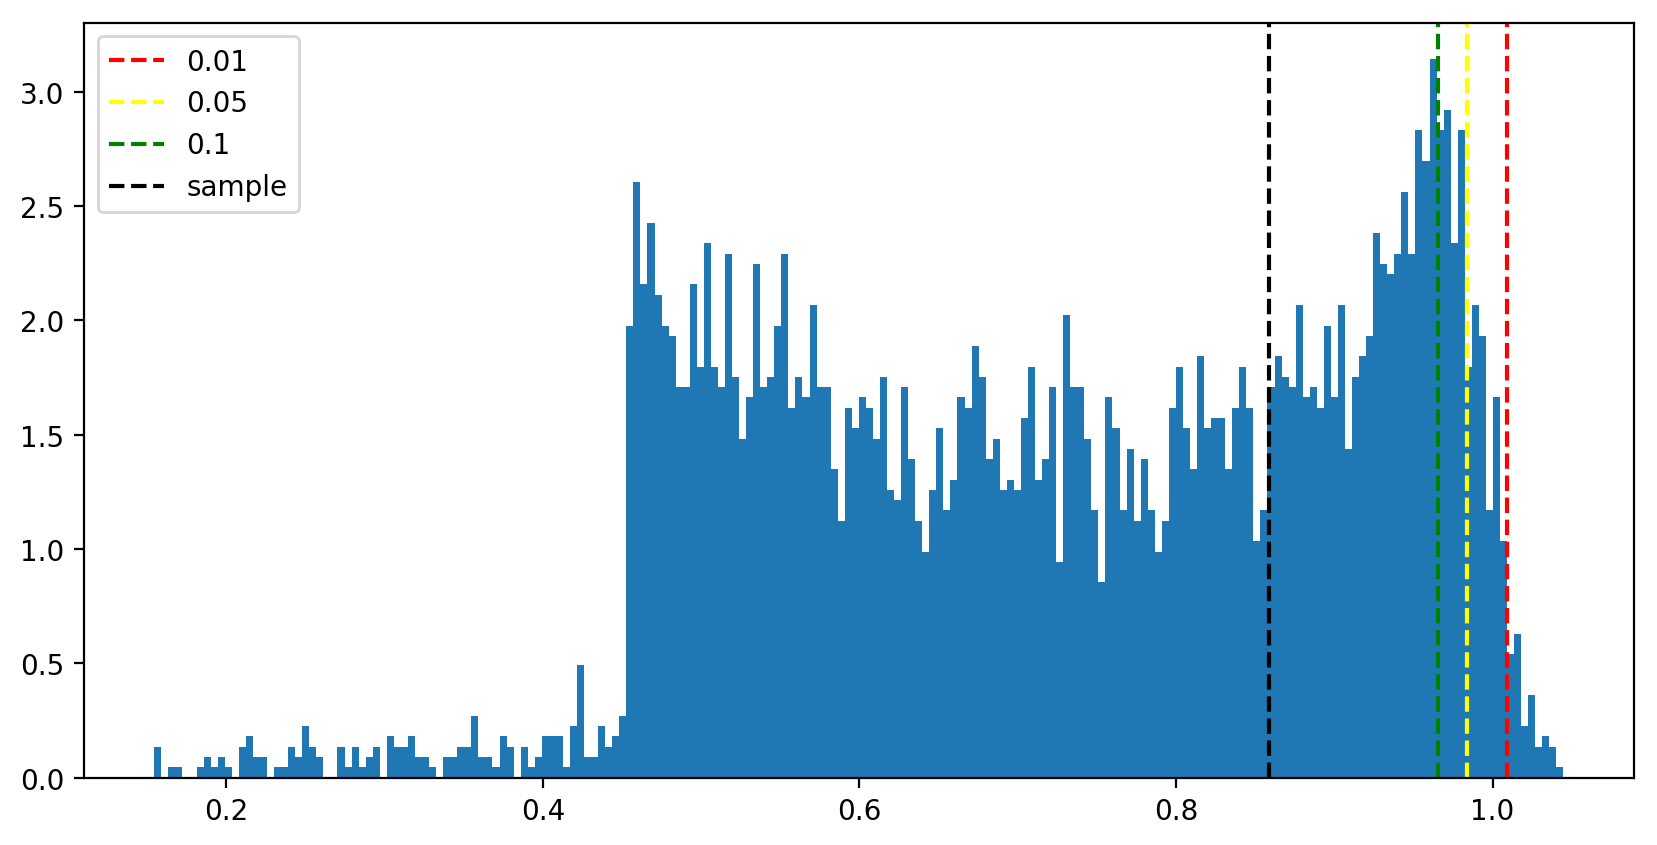

In [251]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(ks, bins=200, density=True)
x01 = np.percentile(ks, 100 - 1)
x05 = np.percentile(ks, 100 - 5)
x1 = np.percentile(ks, 100 - 10)
print('q0.99 =', x01)
print('q0.95 =', x05)
print('q0.9 =', x1)
plt.axvline(x=x01, c='red', linestyle='--', label='0.01')
plt.axvline(x=x05, c='yellow', linestyle='--', label='0.05')
plt.axvline(x=x1, c='green', linestyle='--', label='0.1')
plt.axvline(x=kl, c='black', linestyle='--', label='sample')
plt.legend()
plt.show()

Критерии для проверки $H_0$ уровня значимости $\alpha$ в данном случае имеют вид $K(X) \ge q_{1-\alpha}$. Как видно из графика, мы не отвергаем $H_0$ ни на одном из предложенных уровней значимости, то есть мы не можем с помощью данного критерия с уверенностью сказать, что выборка не принадлежит геометрическому распределению. А так как значение статистики на выборке довольно сильно отличается от граничного значения критерия, она скорее из геометрического, чем из пуассоновского (аналогично шкале Джеффри).

## Задача 4

Считаем данные.

In [264]:
import pandas as pd
df = pd.read_excel('naselenie.xlsx')
n = len(df)
n

242

Зададим распределения из условия задачи.

In [265]:
class distr0_class(sts.rv_continuous):
    def _cdf(self, x, k, *args):
        return 1 - (k * x + 1) ** (-2) if x > 0 else 0
    
class distr1_class(sts.rv_continuous):
    def _cdf(self, x, m, *args):
        return 1 - 1 / (m * x + 1) if x > 0 else 0

In [266]:
distr0 = distr0_class(shapes='k')
distr1 = distr1_class(shapes='m')

Смоделируем распределение RML-статистики при основной гипотезе (по условию оно не зависит от $k$. 
$$
\lambda_n'(X) = \frac{\sup_{k>0}f_0(X, k)}{\sup_{m>0}f_1(X, m)}
$$
Будем максимизировать логарифм функции правдоподобия, потому что сумму оптимизировать проще, чем произведение.

$$
p_0 = dF_0/dx = \frac{2k}{(kx+1)^3}, p_1 = dF_1/dx = \frac{m}{(mx+1)^2}, f_0 = \prod_1^n p_0(X_i) 
$$

In [267]:
def negative_log_likelihood_0(k, sample):
    return  3 * np.sum(np.log(k * sample + 1)) - len(sample) * np.log(2 * k)

def negative_log_likelihood_1(m, sample):
    return  2 * np.sum(np.log(m * sample + 1)) - len(sample) * np.log(m)

In [268]:
from scipy.optimize import minimize

Зададим ограничние $k>eps>0$, ограничив малым числом, чтобы избежать взятия логарифма от нуля.

In [269]:
constraints = [{'type': 'ineq', 'fun': lambda x: x[0]-1e-9}]

In [270]:
N = 1000
ls = []
for i in range(N):
    mod_sample = distr0(2).rvs(n)
    f0 = -minimize(negative_log_likelihood_0, 
                  [1], args=(mod_sample), method='COBYLA', constraints=constraints)['fun']
    f1 = -minimize(negative_log_likelihood_1, 
                  [1], args=(mod_sample), method='COBYLA', constraints=constraints)['fun']
    ls.append(np.exp(f0 - f1))
ls = np.array(ls)

Будем строить гистограмму логарифма статистики $\lambda'$ для наглядности.

q0.05 = 2.3669799699046625


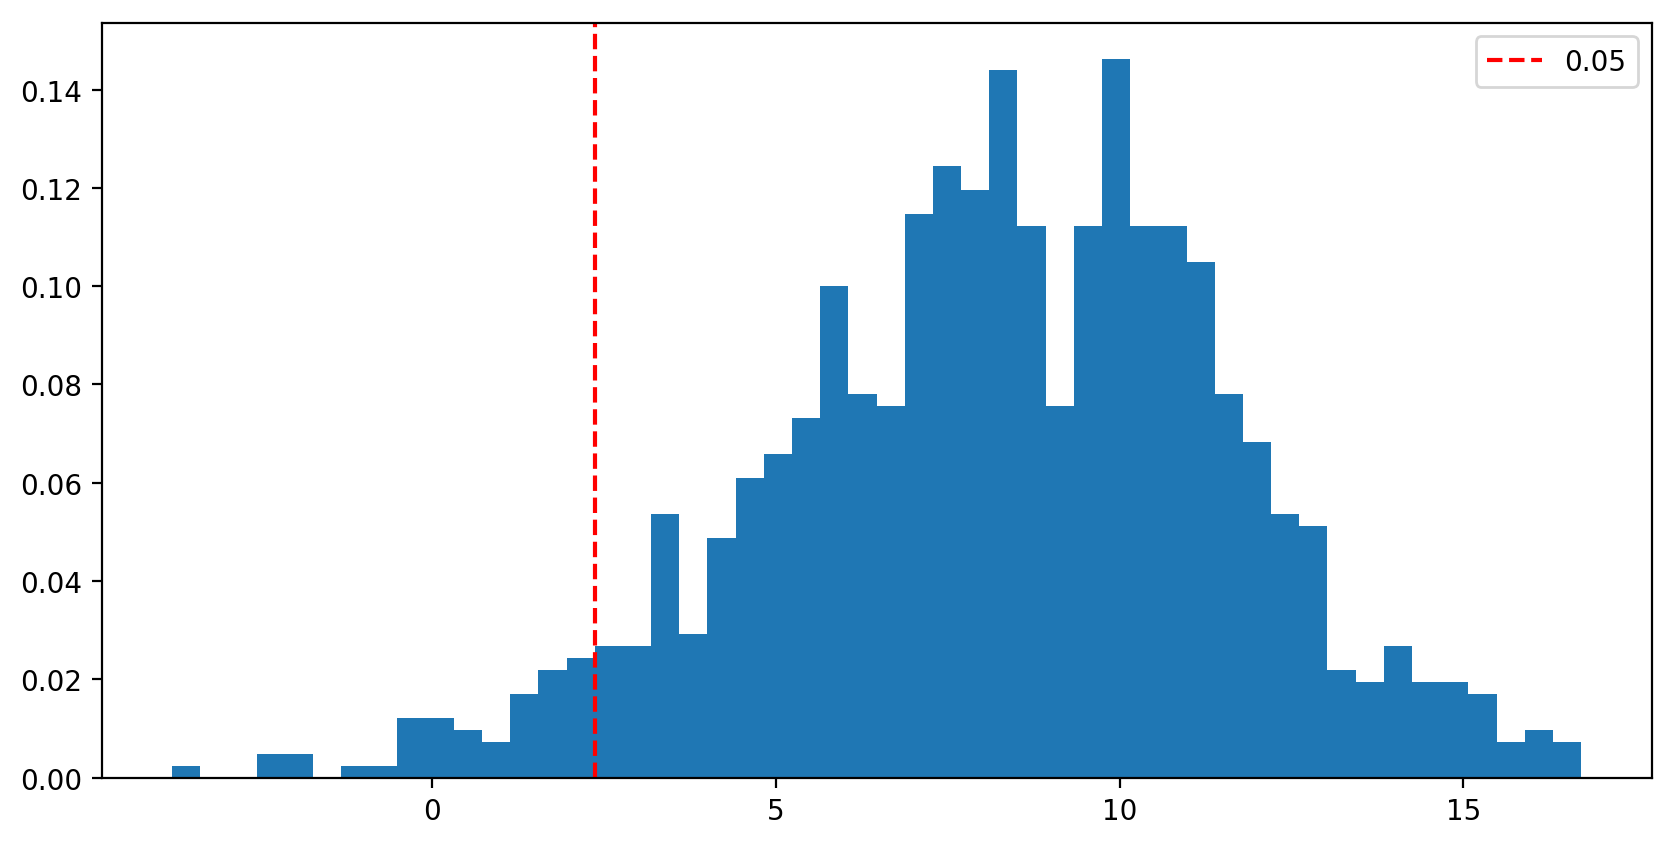

In [271]:
ls_log = np.log(ls)
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(ls_log, bins=50,  density=True)
x05 = np.percentile(ls_log, 5)
print('q0.05 =', x05)
plt.axvline(x=x05, c='red', linestyle='--', label='0.05')
plt.legend()
plt.show()

Критерий для проверки $H_0$ уровня значимости $0.05$ в данном случае имеет вид $K(X) \le q_{\alpha}$.

Получим столбец с данными, переведя их в млн. человек, и посчитаем значение RML-статистики на этой выборке.

In [273]:
people = df['Население'] / 1e6

In [274]:
f0 = -minimize(negative_log_likelihood_0, 
              [1], args=(people), method='COBYLA', constraints=constraints)['fun']
f1 = -minimize(negative_log_likelihood_1, 
              [1], args=(people), method='COBYLA', constraints=constraints)['fun']
l_log_people = f0 - f1

In [275]:
l_log_people

-32.69864186811276

Видим, что значение статистики $\lambda'$ значительно меньше границы критерия, а значит, можно с достаточно большой уверенностью отвергнуть $H_0$ в пользу $H_1$.

Наложим график плотности обоих распределений на гистограмму выборки.

In [256]:
k0 = minimize(negative_log_likelihood_0, 
              [1], args=(people), method='COBYLA', constraints=constraints)['x'][0]
k1 = minimize(negative_log_likelihood_1, 
              [1], args=(people), method='COBYLA', constraints=constraints)['x'][0]
k0, k1

(0.076616015625, 0.2892625)

In [261]:
def f0_density(k, x):
    return 2 * k / np.power(k * x + 1, 3)

def f1_density(m, x):
    return m / np.power(m * x + 1, 2)

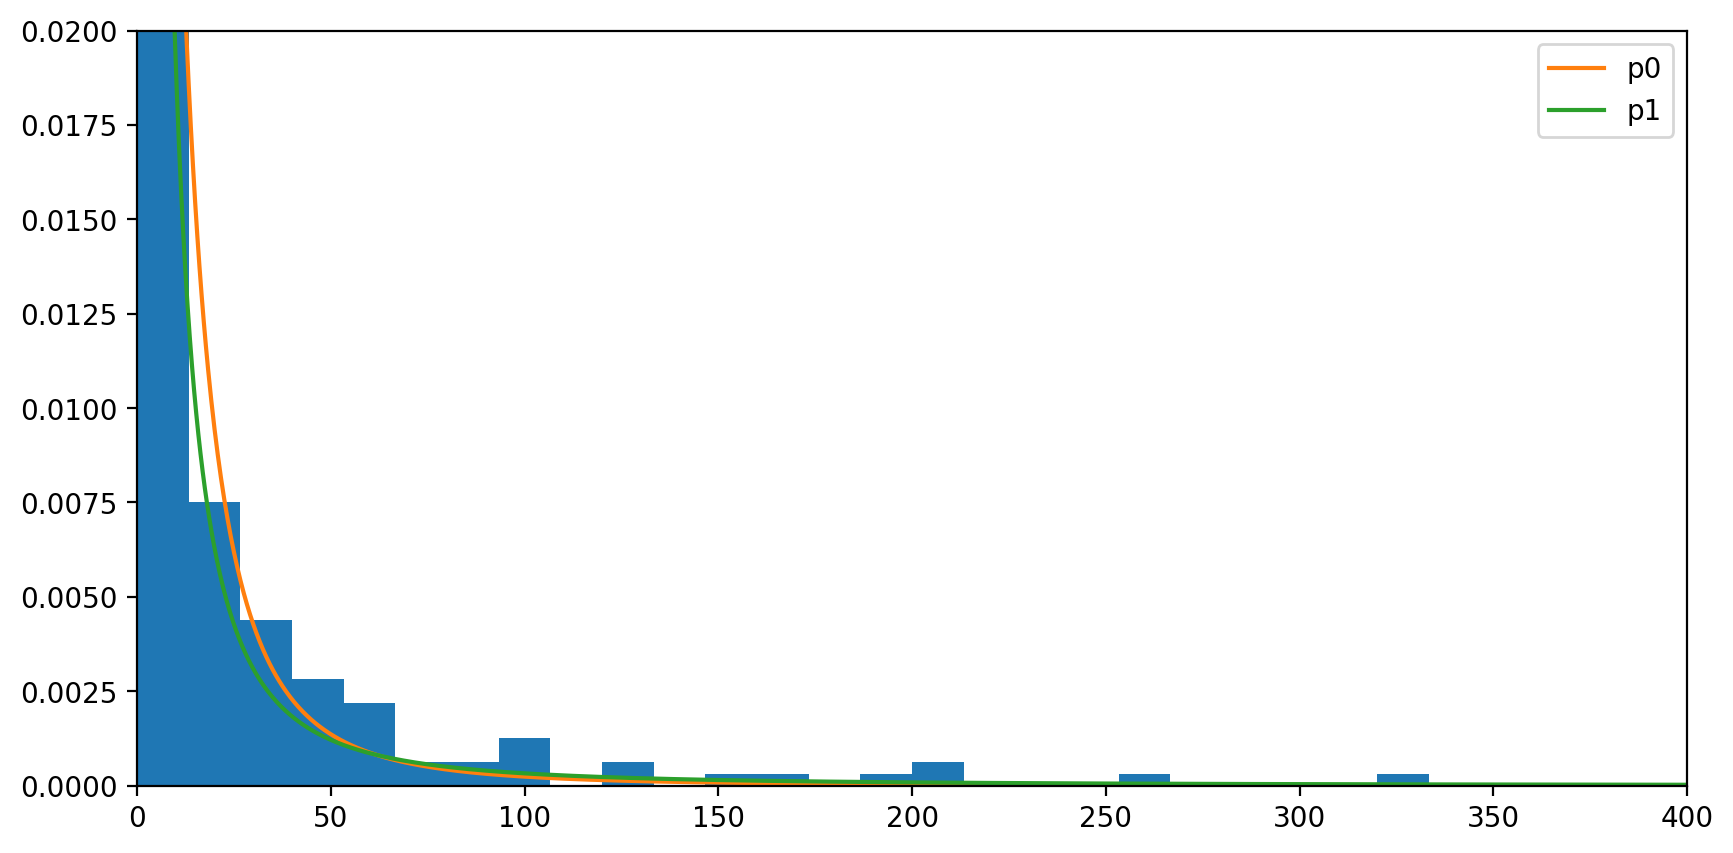

In [263]:
plt.figure(figsize=(10, 5), dpi=200)
xs = np.linspace(0, np.max(people), 5000)
plt.hist(people, bins=30, range=(0,400), density=True)
plt.plot(xs, f0_density(k0, xs), label='p0')
plt.plot(xs, f1_density(k1, xs), label='p1')

plt.ylim(0, 0.02)
plt.xlim(0, 400)
plt.legend()

plt.show()

Действительно, второе распределение лучше подходит к гистограмме, потому что у него более тяжелый хвост.